In [1]:
import pandas as pd
import numpy as np
import cplex

from sys import path
path.append("..") 
import matplotlib.pyplot as plt

from CPNorm import CorrOpti
from CPMini import CorrMini

In [11]:
#EXAMPLE FOR THE minimization procedure
df = pd.DataFrame({
    'A': [20000,300000,4000000, 80000000 ],
    'B': [100,1000,10000,100000],
    'C': [100,1000,10000,100000],
    'D': [34,340,3400, 34000]

}, index=['cell1', 'cell2', 'cell3', 'cell4'])
normalization = CorrMini(df)

normalization.solve(0.9)
print(normalization.get_logbeta_values())
print(normalization.get_normalized_data())

[-1.56641366 -0.51929943  0.57412396  1.51158914]
                  A            B            C            D
cell1  7.369596e+05  3684.797793  3684.797793  1252.831250
cell2  9.917922e+05  3305.973983  3305.973983  1124.031154
cell3  1.066439e+06  2666.097600  2666.097600   906.473184
cell4  2.463207e+06  3079.008331  3079.008331  1046.862833


In [14]:

df = pd.read_csv("/Users/t.stohn/Desktop/Projects/scNormalization/CorrelationPreservationNorm/test/StrongLinearTrajectory/Simulation.tsv", sep = "\t")
df = df[["sample_id","ab_id","ab_count_normalized"]]
df = df.pivot(index="sample_id", columns="ab_id", values="ab_count_normalized")

normalization = CorrMini(df)

normalization.solve(0.99)
#print(normalization.get_logbeta_values())
normData = (normalization.get_normalized_data())

normData.to_csv( "./corrPres.tsv", sep = "\t")

In [2]:
df = pd.DataFrame({
    'A': [20000,300000,4000000, 80000000],
    'B': [100,1000,10000,100000],
    'C': [100,1000,10000,100000],
    'D': [34,340,3400, 34000]

}, index=['cell1', 'cell2', 'cell3', 'cell4'])
normalization = CorrOpti(df, 0.99999)
normalization.write_problem()
normalization.solve()
result = normalization.get_beta_values()
print(normalization.get_normalized_data())
print(normalization.get_beta_values())
print("Covraince Thresholds:")
print(normalization.get_covariance_thresholds())
print(normalization.get_mean_of_absolute_covariances_log())

Default row names c1, c2 ... being created.


[4.306081745657977, 5.480495608739412, 6.604593211581229, 7.904358444135988]
Version identifier: 20.1.0.1 | 2022-01-05 | 9df5e5246
CPXPARAM_Read_DataCheck                          1


CPLEX Error  5002: 'CovarianceEquation_0' is not convex.


Presolve time = 0.00 sec. (0.00 ticks)

Root node processing (before b&c):
  Real time             =    0.00 sec. (0.00 ticks)
Parallel b&c, 12 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.00 sec. (0.00 ticks)


CplexSolverError: CPLEX Error  5002: 'CovarianceEquation_0' is not convex.

In [6]:
%%capture
#TESTING A RANGE OF ETA PARAMETERS
resultDF = pd.DataFrame(columns=['VarLib', 'MeanAbsCov'])

#eta towards 1 results in covarainces going to zero
#eta towards 0 is only library size normalisation
etaList = np.arange(0.0, 1.0, 0.1).tolist()
etaList =  np.arange(0.0, 0.1, 0.005).tolist() + etaList
for eta in etaList:
    normalization = CorrNorm(df, eta)
    normalization.write_problem()
    normalization.solve()

    libVar = (normalization.get_librarySize_variance())
    meanAbsCov = np.mean(np.abs(normalization.get_covariance_thresholds()))
    meanAbsCov = normalization.get_mean_of_absolute_covariances_log()

    new_row = {'VarLib': libVar, 'MeanAbsCov': meanAbsCov}
    resultDF = resultDF.append(new_row, ignore_index=True)
    print("VARIABLES!!")
    print(normalization.get_covariance_thresholds())
    print(libVar)

0     1.776969
1     1.777069
2     1.777047
3     1.777018
4     1.776944
5     1.777023
6     1.489828
7     1.489828
8     1.489829
9     1.489829
10    1.489829
11    1.489829
12    1.489829
13    1.489829
14    1.489829
15    1.489829
16    1.489829
17    1.489829
18    1.489829
19    1.489829
20    1.776969
21    1.489829
22    1.489828
23    1.489827
24    1.489826
25    1.489828
26    1.489824
27    1.489827
28    1.489827
29    1.489828
Name: MeanAbsCov, dtype: float64
0     3.286475e+01
1     4.026502e+04
2     2.369843e+04
3     9.035794e+03
4     3.073968e+03
5     7.337235e+04
6     4.347020e+11
7     4.347055e+11
8     4.347148e+11
9     4.347206e+11
10    4.347249e+11
11    4.347277e+11
12    4.347294e+11
13    4.347306e+11
14    4.347313e+11
15    4.347316e+11
16    4.347318e+11
17    4.347317e+11
18    4.347314e+11
19    4.347310e+11
20    3.286475e+01
21    4.347305e+11
22    4.347153e+11
23    4.346703e+11
24    4.346363e+11
25    4.347072e+11
26    4.346475e+11
27  

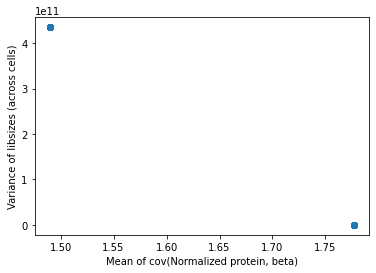

In [7]:
print(resultDF['MeanAbsCov'])
print(resultDF['VarLib'])
print(etaList)

plt.scatter((resultDF['MeanAbsCov']), (resultDF['VarLib']))
plt.xlabel('Mean of cov(Normalized protein, beta)')
plt.ylabel('Variance of libsizes (across cells)')
plt.show()

In [8]:
eta = 0.095

normalization = CorrNorm(df, eta)
normalization.write_problem()
normalization.solve()

print(normalization.get_normalized_data())

Default row names c1, c2 ... being created.


[4.306081745657977, 5.480495608739412, 6.604593211581229, 7.904358444135988]
Version identifier: 20.1.0.1 | 2022-01-05 | 9df5e5246
CPXPARAM_Read_DataCheck                          1
Tried aggregator 2 times.
MIQCP Presolve eliminated 1 rows and 1 columns.
MIQCP Presolve modified 16 coefficients.
Aggregator did 4 substitutions.
Reduced MIQCP has 35 rows, 46 columns, and 104 nonzeros.
Reduced MIQCP has 8 binaries, 0 generals, 0 SOSs, and 8 indicators.
Reduced MIQCP has 5 quadratic constraints.


Presolve time = 0.00 sec. (0.07 ticks)
Probing time = 0.00 sec. (0.01 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 12 threads.
Root relaxation solution time = 0.00 sec. (0.04 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

      0     0      -15.3781     0                    -79.1169        1         
      0     0      -11.7176     0                     Cone: 5        2         
      0     0       -7.8932     0                    Cone: 10        3         
      0     0       -7.6891     0                    Cone: 15        4         
      0     0       -5.9608     0                    Cone: 20        5         
      0     0       -5.8078     0                    Cone: 25        6         
      0     0       -4.3736     0                    Cone: 30        7         
      0     0       -3.2171 

In [9]:
df = pd.read_csv("/Users/t.stohn/Desktop/Projects/scNormalization/CorrelationPreservationNorm/test/StrongLinearTrajectory/Simulation.tsv", sep = "\t")
df = df[["sample_id","ab_id","ab_count_normalized"]]
df = df.pivot(index="sample_id", columns="ab_id", values="ab_count_normalized")

df


ab_id,AB0,AB1,AB10,AB11,AB12,AB13,AB14,AB15,AB16,AB17,AB18,AB19,AB2,AB3,AB4,AB5,AB6,AB7,AB8,AB9
sample_id,,,,,,,,,,,,,,,,,,,,
sample_1,1429977.0,2030567.0,4947720.0,6549294.0,11811608.0,2316562.0,18303702.0,5977303.0,4861921.0,4575926.0,3060150.0,9924039.0,2545359.0,2345162.0,7235682.0,3603541.0,41812520.0,13842175.0,16587730.0,2573958.0
sample_10,1560262.0,666778.0,9174871.0,5734295.0,2840476.0,2680449.0,2920490.0,2107020.0,2387067.0,3400570.0,760127.0,10201710.0,1706953.0,986832.0,4187369.0,1093517.0,7201207.0,4760798.0,6747798.0,1333557.0
sample_100,5034984.0,2190218.0,2416793.0,37938608.0,7779051.0,20769311.0,7930101.0,4078337.0,2643367.0,2668542.0,1837769.0,2945466.0,3751063.0,2593017.0,9717520.0,4153862.0,19258816.0,10623817.0,20341337.0,4833585.0
sample_101,2452005.0,1863524.0,4001672.0,48569314.0,3472039.0,16791330.0,5257099.0,5002090.0,3138566.0,4256681.0,1922372.0,6218285.0,1118114.0,4040904.0,6512525.0,1255427.0,10514197.0,11298839.0,9866868.0,1373123.0
sample_102,3600621.0,1714581.0,8744365.0,90672779.0,12144952.0,20432095.0,7658464.0,3029094.0,5258050.0,2800483.0,1543123.0,6201069.0,2428990.0,3343434.0,3457739.0,4286453.0,33834406.0,4000690.0,11544848.0,4000690.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_95,1007192.0,581387.0,655084.0,9048350.0,2161778.0,11218316.0,2260040.0,1301980.0,1555825.0,1007192.0,565010.0,3144404.0,515879.0,663273.0,4020579.0,1039946.0,6468956.0,1007192.0,6428013.0,925306.0
sample_96,3532299.0,3118945.0,12701246.0,129191963.0,10559320.0,41372993.0,13678265.0,8680437.0,4095964.0,2254659.0,2818324.0,6012424.0,2404970.0,2517703.0,11949693.0,2592858.0,44754982.0,11235718.0,52646289.0,2329814.0
sample_97,1527966.0,1777996.0,10723541.0,95872902.0,5639582.0,44199880.0,3639336.0,6861955.0,3389306.0,6389675.0,4000492.0,8139890.0,4750584.0,3639336.0,14362878.0,1472403.0,14890720.0,15863062.0,4167179.0,2861463.0


In [18]:
%%capture
#TESTING A RANGE OF ETA PARAMETERS

resultDF = pd.DataFrame(columns=['VarLib', 'MeanAbsCov', 'Eta'])

#eta towards 1 results in covarainces going to zero
#eta towards 0 is only library size normalisation

etaList = np.arange(0.0, 1.0, 0.1).tolist()
etaList =  [0.9, 0.99, 0.999, 0.9999, 0.99999, 0.999999, 0.9999999, 0.99999999, 0.999999999, 1.0] + etaList

for eta in etaList:
    normalization = CorrNorm(df, eta)
    normalization.write_problem()
    normalization.solve()

    libVar = (normalization.get_librarySize_variance())
    meanAbsCov = (normalization.get_mean_of_absolute_covariances_log())

    new_row = {'VarLib': libVar, 'MeanAbsCov': meanAbsCov, "Eta" : eta}
    resultDF = resultDF.append(new_row, ignore_index=True)

          VarLib    MeanAbsCov       Eta
0   1.525233e+17  1.369373e-04  0.900000
1   1.528833e+17  1.646778e-05  0.990000
2   1.534079e+17  1.681909e-06  0.999000
3   1.534460e+17  9.521842e-07  0.999900
4   1.535209e+17  1.870814e-07  0.999990
5   1.535294e+17  1.794230e-07  0.999999
6   1.535303e+17  1.862115e-07  1.000000
7   1.535305e+17  2.166551e-07  1.000000
8   1.535305e+17  2.200646e-07  1.000000
9   1.535300e+17  3.769188e-08  1.000000
10  3.509905e+08  2.133371e-01  0.000000
11  1.506840e+17  3.132053e-03  0.100000
12  1.517944e+17  1.974042e-03  0.200000
13  1.523469e+17  1.443135e-03  0.300000
14  1.524375e+17  1.083956e-03  0.400000
15  1.524408e+17  8.077050e-04  0.500000
16  1.523628e+17  5.807899e-04  0.600000
17  1.522763e+17  4.001202e-04  0.700000
18  1.523223e+17  2.732703e-04  0.800000
19  1.525233e+17  1.369373e-04  0.900000


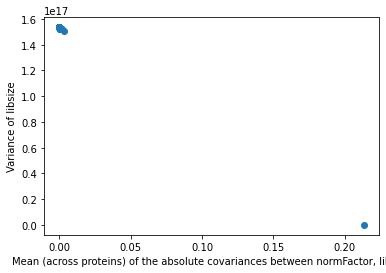

In [19]:
print(resultDF)

# Create scatter plot
plt.scatter(resultDF['MeanAbsCov'], resultDF['VarLib'])

# Add labels and title
plt.xlabel('Mean (across proteins) of the absolute covariances between normFactor, libsize')
plt.ylabel('Variance of libsize')

# Show plot
plt.show()

In [18]:
%%capture
normalization = CorrNorm(df, 0.9999999)
normalization.write_problem()
normalization.solve()

In [19]:
normData = normalization.get_normalized_data()
normData.to_csv( "./corrPres.tsv", sep = "\t")

In [6]:
print(normalization.get_librarySize_variance())
print(normalization.get_mean_of_absolute_covariances_log())


2.346715898705133e+16
Protein counts
_____________
sample_id
sample_1      6.155329
sample_10     6.193198
sample_100    6.701998
sample_101    6.389521
sample_102    6.556377
                ...   
sample_95     6.003112
sample_96     6.548057
sample_97     6.184114
sample_98     6.215051
sample_99     6.183951
Name: AB0, Length: 500, dtype: float64
Calced Cov: 
0.10860378630224732
Protein counts
_____________
sample_id
sample_1      6.307617
sample_10     5.823981
sample_100    6.340487
sample_101    6.270335
sample_102    6.234158
                ...   
sample_95     5.764465
sample_96     6.494008
sample_97     6.249931
sample_98     6.271003
sample_99     6.232937
Name: AB1, Length: 500, dtype: float64
Calced Cov: 
0.11130963409216166
Protein counts
_____________
sample_id
sample_1      6.694405
sample_10     6.962600
sample_100    6.383239
sample_101    6.602241
sample_102    6.941728
                ...   
sample_95     5.816297
sample_96     7.103846
sample_97     7.030338
samp